## Deep Learning Course (980)
## Assignment Four 

__Assignment Goals__:

- Implementing Fully Connected AutoEncoders
- Implementing Convolutional AutoEncoders
- Understand Variational Autoncoder intuition


In this assignment, you will be asked to design a Fully Connected and a CNN AutoEncoder. With a simple change in your Fully Connected AutoEncoder, you will become more familiar with Variational AutoEncoder. 

__DataSet:__ In this Assignment, you will use the MNIST handwritten digit database. You can use  (x_train, _), (x_test, _)  = tensorflow.keras.datasets.mnist.load_data() to load the dataset.

1. (30 points) Implement a Fully Connected AutoEncoder in TensorFlow (cf. Chapter 7). Your AutoEncoder should have a bottleneck with two neurons and Mean Squared Error (MSE) as the objective function. In an AutoEncoder, the layer with the least number of neurons is referred to as a bottleneck. Train your model on MNIST. Plot the train and test loss. Randomly select 10 images from the test set, encode them and visualize the decoded images.
     
2. (35 points) Implement a convolutional AutoEncoder (CAE) that uses only the following types of layers: convolution, pooling, upsampling and transpose. You are limited to use MSE. The encoder and decoder should include one or more layers, with the size and number of filters chosen by you. Start with a bottleneck of size 2, train your model on MNIST and plot the train and test loss. Randomly select 10 images from the test set, encode them and visualize the decoded images. Are the reconstructed images readable for humans? If not, try to find a CAE architecture, including a larger bottleneck, that is powerful enough to generate readable images. The bottleneck should be as small as possible for readability, this is part of the grading criteria.

3. (35 points) This question is about using an AutoEncoder to generate similar but not identical hand digits. We use a naive approach: Try to see if a trained decoder can map randomly generated inputs (random numbers) to a recognizable hand-written digit. 
    1. Start with your Fully Connected and trained AutoEncoder from part 1. Try to generate new images by inputting some random numbers  to the decoder (i.e. the bottleneck layer) and report your results. Hint: This is not easy. You probably want to input at least 10 random numbers. 
    2. Now restrict the AutoEncoder hidden bottleneck layer(s) to have a standard multi-variate normal distribution with mean zeroes and the identity matrix as variance (i.e. no correlations). Retrain the Fully Connected AutoEncoder with the normalized bottleneck. Now randomly generate inputs to the bottleneck layer that are drawn from the multi-variate standard normal distribution, and use the random inputs to generate new images. Report your result.
    3. Are the output images different between 1) and 2)? If so, why do you think this difference occurs?

4. (20 points) Optional: change the AutoEncoder which you developed in the last part of section 3 so that it becomes a Variational AutoEncoder (Introduced by Kingma 2014; see Chapter 7.1). Does the VAE produce a different quality of output image?



__Submission Notes__:

Please use Jupyter Notebook. The notebook should include the final code, results, and answers. You should submit your Notebook in .pdf and .ipynb format. (penalty 10 points).
Your AutoEncoders should have only one bottleneck.
 



__Instructions__:

The university policy on academic dishonesty and plagiarism (cheating) will be taken very seriously in this course. Everything submitted should be your writing or coding. You must not let other students copy your work. Spelling and grammar count.


In [0]:
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Input, BatchNormalization, Lambda
from tensorflow.python.keras import Sequential, Model
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.losses import mse
from matplotlib import pyplot as plt
import random
import numpy as np

In [2]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
inputs_f = (x_train/255).reshape((-1,28*28,))
inputs_test_f = (x_test/255).reshape((-1,28*28,))

In [0]:
# Fully Connected AutoEncoder
inp_f = Input(shape=(28*28,))
enc_f = Dense(400, activation='relu')(inp_f)
enc_f = Dense(100, activation='relu')(enc_f)
h_f = Dense(2, activation='relu')(enc_f)

dec_f = Dense(100, activation='relu')(h_f)
dec_f = Dense(400, activation='relu')(dec_f)
r_f = Dense(28*28, activation='sigmoid')(dec_f)

model_f = Model(inputs=inp_f, outputs=r_f)

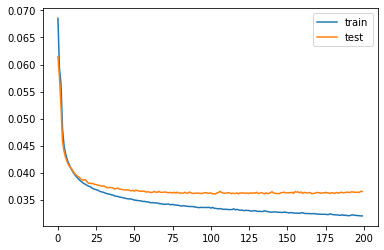

In [0]:
model_f.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001  , beta_1=0.9, beta_2=0.999))
history_f = model_f.fit(inputs_f, inputs_f, epochs=200, batch_size=128, verbose=0, validation_data=(inputs_test_f, inputs_test_f))
plt.plot(history_f.history['loss'], label="train")
plt.plot(history_f.history['val_loss'], label="test")
plt.legend(loc="upper right")

In [0]:
# model_f.save('model_f.h5')
# model_f = load_model('/content/model_f.h5')

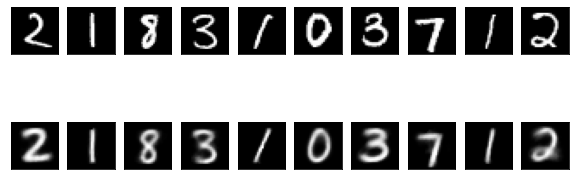

In [0]:
rands = [random.randint(0, inputs_test_f.shape[0]) for x in range(1, 11)]
plt.figure(figsize=(10, 6))
for i in range(10):
    # display original
    ax = plt.subplot(3, 10, i+1)
    plt.imshow(inputs_test_f[rands[i]].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    p = model_f.predict(inputs_test_f[rands[i]].reshape(1,-1)).reshape(28,28)
    ax = plt.subplot(3, 10, i+11)
    plt.imshow(p)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [0]:
inputs_cnn = x_train.reshape(-1,28,28,1)/255
inputs_test_cnn = x_test.reshape(-1,28,28,1)/255

In [0]:
# Convolutional AutoEncoder (CAE) with bottleneck of size 2
inp_c_1 = Input(shape=(28, 28,1))
enc_c_1 = MaxPooling2D((2, 2))(Conv2D(64, (3, 3), activation='relu', padding='same')(inp_c_1))
enc_c_1 = MaxPooling2D((2, 2))(Conv2D(64, (3, 3), activation='relu', padding='same')(enc_c_1))
enc_c_1 = MaxPooling2D((2, 2))(Conv2D(64, (3, 3), activation='relu', padding='same')(enc_c_1))
h_c_1 = MaxPooling2D((2, 2))(Conv2D(2, (3, 3), activation='relu', padding='same')(enc_c_1))

dec_c_1 = Conv2DTranspose(2,(3, 3), strides=2, activation='relu')(h_c_1)
dec_c_1 = Conv2DTranspose(64,(3, 3), strides=2, activation='relu')(dec_c_1)
dec_c_1 = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(dec_c_1)
dec_c_1 = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(dec_c_1)
r_c_1 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(dec_c_1)

model_c_1 = Model(inputs=inp_c_1, outputs=r_c_1)
model_c_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0     

Epoch 1/300
469/469 [==============================] - 7s 15ms/step - loss: 0.1193 - val_loss: 0.1143
Epoch 2/300
469/469 [==============================] - 7s 14ms/step - loss: 0.1120 - val_loss: 0.1143
Epoch 3/300
469/469 [==============================] - 7s 14ms/step - loss: 0.0837 - val_loss: 0.0582
Epoch 4/300
469/469 [==============================] - 7s 14ms/step - loss: 0.0553 - val_loss: 0.0529
Epoch 5/300
469/469 [==============================] - 7s 14ms/step - loss: 0.0522 - val_loss: 0.0508
Epoch 6/300
469/469 [==============================] - 7s 14ms/step - loss: 0.0506 - val_loss: 0.0494
Epoch 7/300
469/469 [==============================] - 7s 14ms/step - loss: 0.0494 - val_loss: 0.0489
Epoch 8/300
469/469 [==============================] - 7s 14ms/step - loss: 0.0485 - val_loss: 0.0479
Epoch 9/300
469/469 [==============================] - 7s 14ms/step - loss: 0.0478 - val_loss: 0.0474
Epoch 10/300
469/469 [==============================] - 7s 14ms/step - loss: 0.047

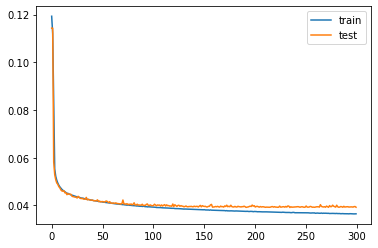

In [0]:
model_c_1.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003 , beta_1=0.9, beta_2=0.999))
history_c_1 = model_c_1.fit(inputs_cnn, inputs_cnn, epochs=300, batch_size=128, verbose=1, validation_data=(inputs_test_cnn, inputs_test_cnn))
plt.plot(history_c_1.history['loss'], label="train")
plt.plot(history_c_1.history['val_loss'], label="test")
plt.legend(loc="upper right")

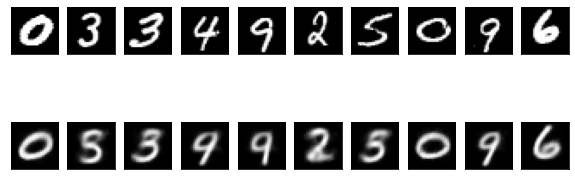

In [0]:
rands = [random.randint(0, inputs_test_cnn.shape[0]) for x in range(1, 11)]
plt.figure(figsize=(10, 6))
for i in range(10):
    # display original
    ax = plt.subplot(3, 10, i+1)
    plt.imshow(inputs_test_cnn[rands[i]].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    p = model_c_1.predict(inputs_test_cnn[rands[i]].reshape(1,28,28,1)).reshape(28,28)
    ax = plt.subplot(3, 10, i+11)
    plt.imshow(p)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### As we can see, the outputs of CAE with bottleneck of size 2 are not good enough, so, in the following, we try it with a bottleneck of size 4:

In [0]:
# Convolutional AutoEncoder (CAE) with bottleneck of size 4
inp_c_2 = Input(shape=(28, 28,1))
enc_c_2 = MaxPooling2D((2, 2))(Conv2D(64, (3, 3), activation='relu', padding='same')(inp_c_2))
enc_c_2 = MaxPooling2D((2, 2))(Conv2D(64, (3, 3), activation='relu', padding='same')(enc_c_2))
enc_c_2 = MaxPooling2D((2, 2))(Conv2D(64, (3, 3), activation='relu', padding='same')(enc_c_2))
h_c_2 = MaxPooling2D((2, 2))(Conv2D(4, (3, 3), activation='relu', padding='same')(enc_c_2))

dec_c_2 = Conv2DTranspose(4,(3, 3), strides=2, activation='relu')(h_c_2)
dec_c_2 = Conv2DTranspose(64,(3, 3), strides=2, activation='relu')(dec_c_2)
dec_c_2 = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(dec_c_2)
dec_c_2 = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(dec_c_2)
r_c_2 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(dec_c_2)

model_c_2 = Model(inputs=inp_c_2, outputs=r_c_2)
model_c_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 64)          0   

Epoch 1/300
469/469 [==============================] - 7s 15ms/step - loss: 0.0930 - val_loss: 0.0543
Epoch 2/300
469/469 [==============================] - 7s 15ms/step - loss: 0.0484 - val_loss: 0.0447
Epoch 3/300
469/469 [==============================] - 7s 15ms/step - loss: 0.0431 - val_loss: 0.0413
Epoch 4/300
469/469 [==============================] - 7s 15ms/step - loss: 0.0408 - val_loss: 0.0396
Epoch 5/300
469/469 [==============================] - 7s 15ms/step - loss: 0.0394 - val_loss: 0.0386
Epoch 6/300
469/469 [==============================] - 7s 15ms/step - loss: 0.0385 - val_loss: 0.0378
Epoch 7/300
469/469 [==============================] - 7s 15ms/step - loss: 0.0377 - val_loss: 0.0372
Epoch 8/300
469/469 [==============================] - 7s 15ms/step - loss: 0.0371 - val_loss: 0.0368
Epoch 9/300
469/469 [==============================] - 7s 15ms/step - loss: 0.0366 - val_loss: 0.0361
Epoch 10/300
469/469 [==============================] - 7s 15ms/step - loss: 0.036

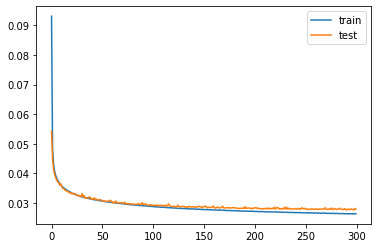

In [0]:
model_c_2.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003 , beta_1=0.9, beta_2=0.999))
history_c_2 = model_c_2.fit(inputs_cnn, inputs_cnn, epochs=300, batch_size=128, verbose=1, validation_data=(inputs_test_cnn, inputs_test_cnn))
plt.plot(history_c_2.history['loss'], label="train")
plt.plot(history_c_2.history['val_loss'], label="test")
plt.legend(loc="upper right")

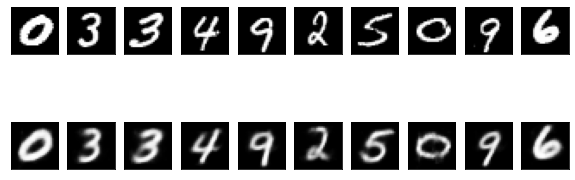

In [0]:
plt.figure(figsize=(10, 6))
for i in range(10):
    # display original
    ax = plt.subplot(3, 10, i+1)
    plt.imshow(inputs_test_cnn[rands[i]].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    p = model_c_2.predict(inputs_test_cnn[rands[i]].reshape(1,28,28,1)).reshape(28,28)
    ax = plt.subplot(3, 10, i+11)
    plt.imshow(p)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

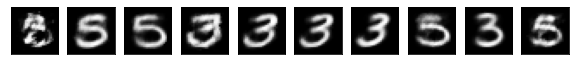

In [0]:
# Generating new images by inputting some random numbers to the decoder of the Fully Connected AE
# model_f = load_model('/content/model_f.h5')
input_layer = Input(shape=(2,))
x = input_layer
for layer in model_f.layers[4:]:
    x = layer(x)
decoder_f = Model(input_layer, x)

plt.figure(figsize=(10, 6))
for i in range(10):
    inp = np.random.normal(0, 1, 2).reshape((-1,2,))
    p = decoder_f.predict(inp).reshape(28,28)
    ax = plt.subplot(2, 10, i+11)
    plt.imshow(p)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [0]:
# Restricting the Fully Connected AutoEncoder hidden bottleneck layer to have a standard multi-variate normal distribution 
# with mean zeroes and the identity matrix as variance
inp_f_2 = Input(shape=(28*28,))
enc_f_2 = Dense(400, activation='relu')(inp_f_2)
enc_f_2 = Dense(100, activation='relu')(enc_f_2)
h_f_2 = Dense(2, activation='relu')(enc_f_2)
h_f_2_normalized = BatchNormalization(center=False, scale=False)(h_f_2)

dec_f_2 = Dense(100, activation='relu')(h_f_2_normalized)
dec_f_2 = Dense(400, activation='relu')(dec_f_2)
r_f_2 = Dense(28*28, activation='sigmoid')(dec_f_2)

model_f_2 = Model(inputs=inp_f_2, outputs=r_f_2)
model_f_2.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
_________________________________________________________________
batch_normalization (BatchNo (None, 2)                 4         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 400)               4040

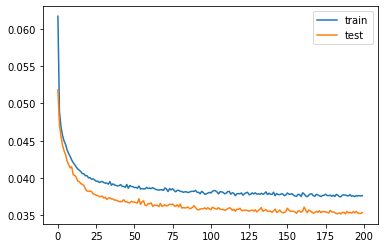

In [0]:
model_f_2.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001  , beta_1=0.9, beta_2=0.999))
history_f_2 = model_f_2.fit(inputs_f, inputs_f, epochs=200, batch_size=128, verbose=0, validation_data=(inputs_test_f, inputs_test_f))
plt.plot(history_f_2.history['loss'], label="train")
plt.plot(history_f_2.history['val_loss'], label="test")
plt.legend(loc="upper right")

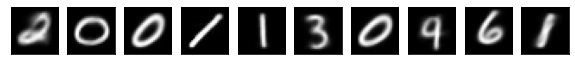

In [0]:
input_layer_2 = Input(shape=(2,))
x_2 = input_layer_2
for layer in model_f_2.layers[5:]:
    x_2 = layer(x_2)
decoder_f_2 = Model(input_layer_2, x_2)

plt.figure(figsize=(10, 6))
for i in range(10):
    inp = np.random.normal(0, 1, 2).reshape((-1,2,))
    p = decoder_f_2.predict(inp).reshape(28,28)
    ax = plt.subplot(2, 10, i+11)
    plt.imshow(p)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### As we can see, after restricting the AutoEncoder hidden bottleneck layer to have a standard multi-variate normal distribution with mean zeroes and the identity matrix as variance (i.e. no correlations), we get much better results. The reason is that for the second model we force the output of the bottleneck to have mean zero and variance 1. So, afterwards when we sample from mulrivariate normal distribution and use it as the input for the decoder part of the model, it can generate good results, because during the training it has learned how to do it perfecly. But for the first model, since there was no restriction, we do not know the distribution of the bottleneck, so when we sample from multivariate guassian and fed it to its decoder, it cannot generate good results. 

In [0]:
# Sampling layer for VAE
def sampling(args):
    m, v = args
    batch = K.shape(m)[0]
    dim = K.int_shape(m)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return m + K.exp(0.5 * v) * epsilon

In [0]:
# VAE network
inp_vae = Input(shape=(28*28,))
enc_vae = Dense(400, activation='relu')(inp_vae)
enc_vae = Dense(100, activation='relu')(enc_vae)
h_vae_mean = Dense(2)(enc_vae)
h_vae_var = Dense(2)(enc_vae)
h_vae_sample = Lambda(sampling, output_shape=(2,))([h_vae_mean, h_vae_var])

dec_vae =  Dense(100, activation='relu')(h_vae_sample)
dec_vae =  Dense(400, activation='relu')(dec_vae)
r_vae = Dense(28*28, activation='sigmoid')(dec_vae)

vae = Model(inp_vae, r_vae)

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 45.9120 - val_loss: 41.1198
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 40.3353 - val_loss: 39.5749
Epoch 3/200
469/469 [==============================] - 2s 3ms/step - loss: 39.0554 - val_loss: 38.5128
Epoch 4/200
469/469 [==============================] - 2s 3ms/step - loss: 38.1145 - val_loss: 37.7664
Epoch 5/200
469/469 [==============================] - 2s 3ms/step - loss: 37.4537 - val_loss: 37.3679
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 37.1151 - val_loss: 37.1115
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 36.7402 - val_loss: 36.6586
Epoch 8/200
469/469 [==============================] - 2s 4ms/step - loss: 36.5098 - val_loss: 36.5993
Epoch 9/200
469/469 [==============================] - 2s 4ms/step - loss: 36.2787 - val_loss: 36.2031
Epoch 10/200
469/469 [==============================] - 2s 4ms/step - los

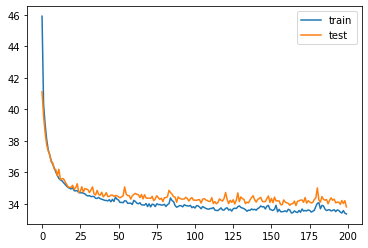

In [6]:
# Losses, optimizer and trainig of VAE
reconstruction_loss = mse(r_vae,inp_vae)
reconstruction_loss *= 784
kl_loss = 1 + h_vae_var - K.square(h_vae_mean) - K.exp(h_vae_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999))
history_vae = vae.fit(inputs_f, inputs_f, epochs=200, batch_size=128, verbose=1, validation_data=(inputs_test_f, inputs_test_f))
plt.plot(history_vae.history['loss'], label="train")
plt.plot(history_vae.history['val_loss'], label="test")
plt.legend(loc="upper right")

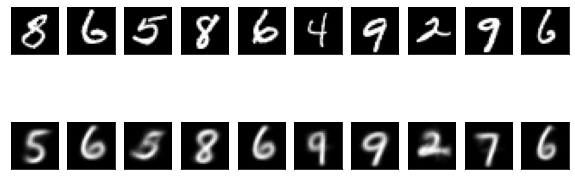

In [7]:
rands = [random.randint(0, inputs_test_f.shape[0]) for x in range(1, 11)]
plt.figure(figsize=(10, 6))
for i in range(10):
    # display original
    ax = plt.subplot(3, 10, i+1)
    plt.imshow(inputs_test_f[rands[i]].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    p = vae.predict(inputs_test_f[rands[i]].reshape(1,-1)).reshape(28,28)
    ax = plt.subplot(3, 10, i+11)
    plt.imshow(p)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

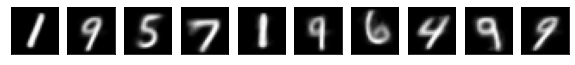

In [8]:
input_layer_3 = Input(shape=(2,))
x_3 = input_layer_3
for layer in vae.layers[6:9]:
    x_3 = layer(x_3)
decoder_vae = Model(input_layer_3, x_3)

plt.figure(figsize=(10, 6))
for i in range(10):
    inp = np.random.normal(0, 1, 2).reshape((-1,2,))
    p = decoder_vae.predict(inp).reshape(28,28)
    ax = plt.subplot(2, 10, i+11)
    plt.imshow(p)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### As we can see above, the VAE can generate new images better than the AE. It can generate a wide veriaty of numbers, however the outputs are still bllury.